James Gardner, March 2022 

want to analyse science case/s for CE only:

CE-N 40km with CE-S 40km or 20km

if done, then look at CE-S with one ET detector

verify techniques by replicating *Borhanian and Sathya 2022*

In [1]:
%load_ext autoreload
%autoreload 2

from networks import *
from detection_rates import *
from measurement_errors import *
from useful_functions import flatten_list
from useful_plotting_functions import *

from scipy.stats import rv_discrete

# suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

### Replicating Borhanian and Sathya 2022 injections and detection rates, then for CE only 

In [ ]:
# batch detection rate results for given science case and network set

# waveform, LAL list: https://lscsoft.docs.ligo.org/lalsuite/lalsimulation/group___l_a_l_sim_inspiral__h.html
# --- BNS ---
# science_case = 'BNS'
# wf_model_name, wf_other_var_dic = 'lal_bns', dict(approximant='IMRPhenomD_NRTidalv2') # for tidal, see https://arxiv.org/abs/1905.06011
# to-do: missing dimensionless tidal parameters, calculate tidal parameters from sampled m1, m2 in injections.py? requires Love number and radii (i.e. choose an EoS)
# --- BBH ---
science_case = 'BBH'
wf_model_name, wf_other_var_dic = 'lal_bbh', dict(approximant='IMRPhenomHM')
# --- analytic waveforms ---
# wf_model_name, wf_other_var_dic = 'tf2', None # to-do: stop using this once tidal params found
# wf_model_name, wf_other_var_dic = 'tf2_tidal', None

# number of injections per redshift bin (6 bins)
num_injs = 10

# network_spec_list = BS2022_STANDARD_6['nets']
# network_spec_list = CE_ONLY['nets']
network_spec_list = CE_S_W_ET['nets']

for network_spec in tqdm(network_spec_list):
    detection_rate_for_network_and_waveform(network_spec, science_case, wf_model_name, wf_other_var_dic, num_injs, show_fig=False, print_progress=False, print_reach=False)

In [ ]:
# meta-batch to save all the required results (but not generate plots to save time) for the below cell
network_spec_list = NET_LIST

science_cases = ('BNS', 'BBH')
# --- numerical BNS as in B&S2021 ---
# wf_specifications = (('lal_bns', dict(approximant='IMRPhenomD_NRTidalv2')), ('lal_bbh', dict(approximant='IMRPhenomHM')))
# --- analytic BNS ---
wf_specifications = (('tf2_tidal', None), ('lal_bbh', dict(approximant='IMRPhenomHM')))

# number of injections per redshift bin (6 bins), tuple over science cases (more for symbolic wf.'s than numerical)
num_injs_list = (100, 10)

for network_spec in tqdm(network_spec_list):
    for j, science_case in enumerate(science_cases):
        wf_model_name, wf_other_var_dic = wf_specifications[j]        
        detection_rate_for_network_and_waveform(network_spec, science_case,
                                                wf_model_name, wf_other_var_dic, num_injs_list[j],
                                                generate_fig=True, show_fig=False,
                                                print_progress=False, print_reach=False)

### Collating different networks saved using the above method

In [ ]:
# batch of six collated plots: all three network sets and two science cases
# assumes results saved: above results generating cell must be run to save results for this cell

# ! remember to update plot label for each case else the plot will be overwritten
# how standard the "standard 6" are is unclear, seems like an invention of B&S2022
# CE only, with 2G+ as a reference
# CE South with one ET detector

# adding HLVKI+ reference to CE nets
network_dict_list = [NET_DICT_LIST[0],]
network_sets = [net_dict['nets'] for net_dict in network_dict_list]
#(BS2022_STANDARD_6['nets'],)
#                 CE_ONLY_C_and_S['nets'] + [['A+_H', 'A+_L', 'V+_V', 'K+_K', 'A+_I']],
#                 CE_ONLY_C_and_N['nets'] + [['A+_H', 'A+_L', 'V+_V', 'K+_K', 'A+_I']],
#                 CE_S_W_ET['nets'] + [['A+_H', 'A+_L', 'V+_V', 'K+_K', 'A+_I']])
network_labels = [net_dict['label'] for net_dict in network_dict_list]
#('standard_6', 'CE_only_C..S', 'CE_only_C..N', 'ET..CE_S')
science_cases = ('BNS', 'BBH')
specific_wfs = ('tf2_tidal', None)

for i, network_set in enumerate(network_sets):
    for j, science_case in enumerate(science_cases):
        plot_label = f'SCI-CASE_{science_case}_NET_{network_labels[i]}'
        specific_wf = specific_wfs[j]
        if specific_wf is not None:
            plot_label += f'_WF_{specific_wf}'
        compare_detection_rate_of_networks_from_saved_results(network_set, science_case, plot_label=plot_label, specific_wf=specific_wf, show_fig=False, data_path='data_20--200_injs/data_for_plots/') 

### Measurement errors

In [ ]:
# B&S2022 plots cumulative density functions (CDF) versus redshift to show distribution of measurement errors (why not just use PDF, i.e. normalised histograms, like B2021?)
# for non-SNR quantities only use results above an SNR threshold (e.g. 10), alternatively, for all non--sky area quantities only use results below a 90% credible sky area threshold (e.g. 4.4e-2 sqrDeg, where the full Moon is ~20.0e-2 sqrDeg given a radius of 0.5 deg) --> don't have enough resolution to attempt sky-area thresholding

# batching collation of standard sets assuming results saved
# compare plots to B&S2022 Figs 3 and 4
network_dict_list = [NET_DICT_LIST[0],]
network_sets = [net_dict['nets'] for net_dict in network_dict_list]
network_labels = [net_dict['label'] for net_dict in network_dict_list]
# network_sets = (BS2022_STANDARD_6['nets'],
#                 CE_ONLY_C_and_S['nets'] + [['A+_H', 'A+_L', 'V+_V', 'K+_K', 'A+_I']],
#                 CE_ONLY_C_and_N['nets'] + [['A+_H', 'A+_L', 'V+_V', 'K+_K', 'A+_I']],
#                 CE_S_W_ET['nets'] + [['A+_H', 'A+_L', 'V+_V', 'K+_K', 'A+_I']])
# network_labels = ('standard_6', 'CE_only_C..S', 'CE_only_C..N', 'ET_E..CE_S')
science_cases = ('BNS', 'BBH')
specific_wfs = ('tf2_tidal', None)

for i, network_set in enumerate(tqdm(network_sets)):
    for j, science_case in enumerate(science_cases):
        plot_label = f'SCI-CASE_{science_case}_NETS_{network_labels[i]}'
        plot_title = f'Science case: {science_case}, network set: {network_labels[i]}'
        specific_wf = specific_wfs[j]
        if specific_wf is not None:
            plot_label += f'_WF_{specific_wf}'
            plot_title += f', WF: {specific_wf}'
        collate_measurement_errs_CDFs_of_networks(network_set, science_case, specific_wf=specific_wf, plot_label=plot_label, plot_title=plot_title, full_legend=False, print_progress=False, show_fig=False, normalise_count=True, xlim_list=None, threshold_by_SNR=True, CDFmin=1e-4, data_path='data_20--200_injs/data_for_plots/')
#         # for reference, without SNR thresholding
#         collate_measurement_errs_CDFs_of_networks(network_set, science_case, specific_wf=specific_wf, plot_label=plot_label+'_SNR-THR_False', plot_title=plot_title, full_legend=False, print_progress=False, show_fig=False, normalise_count=True, xlim_list=None, threshold_by_SNR=False)

In [ ]:
# for direct comparison, use B&S2022's xlim_list 
# --- options ---
net_dict, science_case, wf_model_name = BS2022_SIX, 'BNS', 'tf2_tidal'
network_set, network_label = net_dict['nets'], net_dict['label']
plot_label = f'NET_{network_label}_SCI-CASE_{science_case}_WF_{wf_model_name}'
# plot_label = 'contoured'
plot_title = f'Networks: {network_label}, science-case: {science_case}, waveform: {wf_model_name}'        
ymin_CDF = 1e-4
data_path='tmp_data/data_redshift_snr_errs_sky-area/'
linestyles_from_BS2022 = True

collate_measurement_errs_CDFs_of_networks(network_set, science_case, plot_label=plot_label, plot_title=plot_title, full_legend=False, print_progress=False, show_fig=False, normalise_count=True, threshold_by_SNR=True, CDFmin=ymin_CDF, data_path=data_path, num_bins=40, linestyles_from_BS2022=linestyles_from_BS2022, contour=False)
# collate_measurement_errs_CDFs_of_networks(network_set, science_case, plot_label=plot_label+'_XLIMS_preset', plot_title=plot_title+', XLIMS: preset to B&S2022', full_legend=False, print_progress=False, show_fig=False, normalise_count=True, xlim_list='B&S2022', threshold_by_SNR=True, CDFmin=ymin_CDF, data_path=data_path, num_bins=40, linestyles_from_BS2022=linestyles_from_BS2022)

### Sky localisation
Is there a better way to analyse and/or communicate sky localisation?

In [ ]:
# --- input parameters ---
data_path = 'tmp_data/data_redshift_snr_errs_sky-area/'
input_file_name = 'results_NET_CE-40-CBO_C..CE-20-PMO_N..CE-40-CBO_S_SCI-CASE_BNS_WF_tf2_tidal_INJS-PER-ZBIN_30000.npy'
plot_title = file_name_to_multiline_readable(input_file_name)
# file_name = 'results_NET_A+_H..A+_L..V+_V..K+_K..A+_I_SCI-CASE_BNS_WF_tf2_tidal_INJS-PER-ZBIN_30000.npy'
output_path = 'plots/'
output_file_name = 'sky_localisation.pdf'

# loading
results = np.load(data_path + input_file_name)

z = results[:,0]
snr = results[:,1]
skyarea = results[:,6]

# plotting
good_colour = '#e84393'
v_good_colour = '#00b894'

plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 12), gridspec_kw=dict(hspace=0.05))

axs[0].axhspan(SNR_THRESHOLD_HI, max(snr), color=v_good_colour, alpha=0.5)
axs[0].axhspan(SNR_THRESHOLD_LO, SNR_THRESHOLD_HI, color=good_colour, linestyle='-', alpha=0.5)
axs[0].loglog(z, snr, ',')
axs[0].set(ylabel=r'SNR, $\rho$', ylim=(None, max(snr)))

if max(skyarea) > TOTAL_SKY_AREA_SQR_DEG:
    axs[1].axhspan(TOTAL_SKY_AREA_SQR_DEG, max(skyarea), color=(0,0,0,0.5))
axs[1].loglog(z[snr < SNR_THRESHOLD_LO], skyarea[snr < SNR_THRESHOLD_LO], ',', color='#0984e3')
axs[1].loglog(z[np.logical_and(SNR_THRESHOLD_LO < snr, snr < SNR_THRESHOLD_HI)], skyarea[np.logical_and(SNR_THRESHOLD_LO < snr, snr < SNR_THRESHOLD_HI)], ',', color=good_colour)
axs[1].loglog(z[SNR_THRESHOLD_HI < snr], skyarea[SNR_THRESHOLD_HI < snr], ',', color=v_good_colour)
axs[1].axhline(EM_FOLLOWUP_SKY_AREA_SQR_DEG, color='k', linewidth=1, label='follow-up\nthreshold')
axs[1].axhline(MOON_SKY_AREA_SQR_DEG, color='k', linestyle='--', linewidth=1, label='Moon')
axs[1].set(ylabel=r'$\Omega_{90}$ / deg${}^2$', xlabel='redshift, z', ylim=(None, max(skyarea)))
axs[1].legend(handlelength=1)

fig.suptitle(plot_title, y=0.9, verticalalignment='baseline')
fig.align_labels()

fig.canvas.draw()
force_log_grid(axs[0])
force_log_grid(axs[1])

# fig.savefig(output_path + output_file_name, bbox_inches='tight')
# # .pdf is 5 MB uncompressed, save as a .jpg for messaging (.png has a transparent background)
# fig.savefig(output_path + output_file_name.replace('.pdf', '.jpg'), bbox_inches='tight')
plt.show()

### Following B&S2022 Section 4A: *Incorporation of redshift-dependent merger rates*

In [2]:
norm_tag = 'GWTC3'

if norm_tag == 'GWTC3':
    normalisations = (GWTC3_MERGER_RATE_BNS, GWTC3_MERGER_RATE_BBH)
elif norm_tag == 'GWTC2':
    normalisations = (GWTC2_MERGER_RATE_BNS, GWTC2_MERGER_RATE_BBH)
     
# # to use on saved results or compare to B&S2022
zmin, zmax = 1e-2, 50   
# to compare to Ssohrab's email
# zmin, zmax = 1.7e-3, 50      
    
# first, check that can recover a 10-year observation merger population (see From_Ssohrab_BNS_population_vs_redshift.png)
xlim, ylim = (zmin, zmax), (5e-1, 8e5)
z_arr = np.geomspace(*xlim, 100)
bns_rate_arr = np.array(parallel_map(lambda z : merger_rate_bns(z, normalisation=normalisations[0]), z_arr, parallel=True))
bbh_rate_arr = np.array(parallel_map(lambda z : merger_rate_bbh(z, normalisation=normalisations[1]), z_arr, parallel=True))
bns_obs_rate_arr = np.array(parallel_map(lambda z : merger_rate_in_obs_frame(merger_rate_bns, z, normalisation=normalisations[0]), z_arr, parallel=True))
bbh_obs_rate_arr = np.array(parallel_map(lambda z : merger_rate_in_obs_frame(merger_rate_bbh, z, normalisation=normalisations[1]), z_arr, parallel=True))
# merger rate R(z) in (count)/yr, multiply by number of years to get (count)
observation_time_in_years = 10

The units of $R(z)$ are $\frac{[\text{count}]}{\text{year}\, [\text{redshift}]}$ since the yearly number of sources in $(z_0,z_0+\Delta z)$ is $\int_{z_0}^{z_0+\Delta z} R(z) \text{d}z$ not $R_i=R(z^\ast)$ where $z^\ast$ is any point in, e.g. the geometric mean of, $(z_0,z_0+\Delta z)$.

Instead of $p_i = \frac{R_i}{\sum_j R_j}$, therefore, I use $q_i = \frac{R_i \Delta z_i}{\sum_j R_j \Delta z_j} \approx \frac{R_i \Delta z_i}{\int R(z) \text{d}z}$ where $\Delta z_i$ is the width of the bin as the probability of selecting the index $i$ of each bin. For a ten-year observation period $\tau=10$, I draw $\tau \int R(z) \text{d}z$ samples from the probability distribution which means that the expected number of samples in each bin is $\frac{\tau R_i \Delta z_i \int R(z) \text{d}z}{\sum_j R_j \Delta z_j}\approx \tau R_i \Delta z_i\approx \tau\int_{z_0}^{z_0+\Delta z} R(z) \text{d}z$ as it should be (instead of $\frac{\tau R_i \int R(z) \text{d}z}{\sum_j R_j}$).

Plotting $\tau R_i \Delta z_i$ against $z$ is *not* the same as plotting $\tau R(z)$ against $z$ since, as the width of each bin decreases, $\tau R_i \Delta z_i \rightarrow 0$. For example, for a uniform merger rate, splitting a bin in half means that there are now two bins next to each other with half the initial number of sources. On a plot, however, it just appears that the number of sources decreased since the split bins look the same.

In [3]:
# replicating section 4A
# N in B&S2022, containing ~2000 injections from uniform sampler (varying due to randomness and linear sampling)
num_subzbin = 75 # 150 in B&S2022 but 75 in Ssohrab's email.
subzbin = list(zip(np.geomspace(zmin, zmax, num_subzbin + 1)[:-1], np.geomspace(zmin, zmax, num_subzbin + 1)[1:]))
# using geometric mean to find the log-centre of each bin
subzbin_centres = [gmean(zbin) for zbin in subzbin]
subzbin_widths = np.array([zbin[1] - zbin[0] for zbin in subzbin])
# using rate in the source frame like B&S2022, to-do: does this make sense if we're coutning observations? are we trying to emulate using a cosmological sampler originally?

merger_rate_fns = (
    lambda z : merger_rate_bns(z, normalisation=normalisations[0]),
    lambda z : merger_rate_in_obs_frame(merger_rate_bns, z, normalisation=normalisations[0]),
    lambda z : merger_rate_bbh(z, normalisation=normalisations[1]),
    lambda z : merger_rate_in_obs_frame(merger_rate_bbh, z, normalisation=normalisations[1]))
# R_i in B&S2022
subzbin_merger_rates = [np.array(parallel_map(merger_rate, subzbin_centres, parallel=True)) for merger_rate in merger_rate_fns]
# p_i in B&S2022
subzbin_probabilities = [rate/rate.sum() for rate in subzbin_merger_rates]
# q_i, weighting by width of each bin to estimate the actual number of mergers (see latex'd notes)
subzbin_weighted_probs = [rate*subzbin_widths/np.sum(rate*subzbin_widths) for rate in subzbin_merger_rates]

# "the desired [total, cosmological] number" of mergers over 10 years, integrating the merger rate in the *source* frame over the redshift range
observation_time_in_years = 10
num_draws = [int(observation_time_in_years*quad(merger_rate, zmin, zmax)[0]) for merger_rate in merger_rate_fns]
drawn_indicies = [rv_discrete(values=(range(num_subzbin), pdf)).rvs(size=num_draws[i]) for (i, pdf) in enumerate(subzbin_probabilities)]
drawn_weighted_inds = [rv_discrete(values=(range(num_subzbin), pdf)).rvs(size=num_draws[i]) for (i, pdf) in enumerate(subzbin_weighted_probs)]
# n_i in B&S2022: sample i with probability p_i "up to the desired [total, cosmological] number" of mergers over 10 years
subzbin_num_samples = [np.array([np.sum(indicies == i) for i in range(num_subzbin)]) for indicies in drawn_indicies]
subzbin_num_samples_weighted = [np.array([np.sum(indicies == i) for i in range(num_subzbin)]) for indicies in drawn_weighted_inds]

# cumulative merger rate (goes from zero but this should change little), pass source frame to detection_rate_limit
cumulative_merger_rate_bns_obs = np.array(parallel_map(lambda z : detection_rate_limit(merger_rate_fns[0], z), subzbin_centres, parallel=True))
cumulative_merger_rate_bbh_obs = np.array(parallel_map(lambda z : detection_rate_limit(merger_rate_fns[2], z), subzbin_centres, parallel=True))

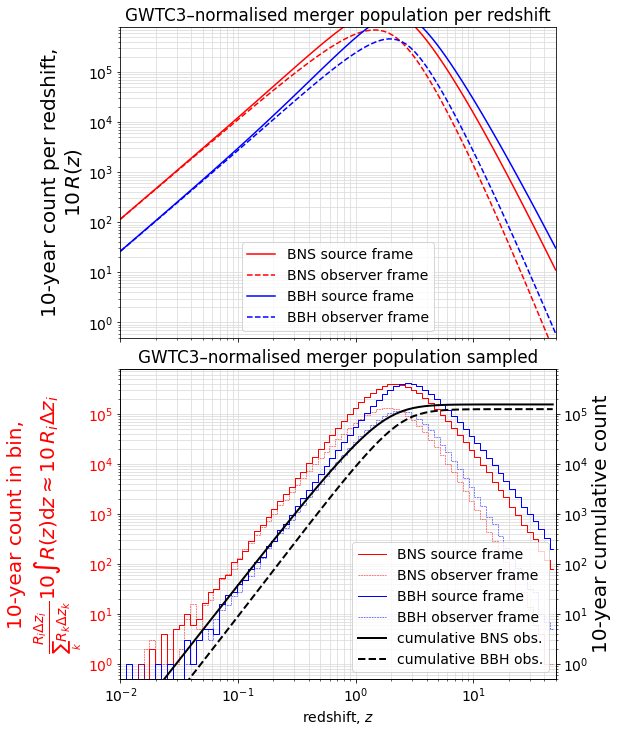

In [4]:
colour1, colour2 = 'r', 'b'

plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(7.8, 12), gridspec_kw=dict(hspace=0.1))

axs[0].loglog(z_arr, observation_time_in_years*bns_rate_arr, color=colour1, label='BNS source frame')
axs[0].loglog(z_arr, observation_time_in_years*bns_obs_rate_arr, linestyle='--', color=colour1, label='BNS observer frame')
axs[0].loglog(z_arr, observation_time_in_years*bbh_rate_arr, color=colour2, label='BBH source frame')
axs[0].loglog(z_arr, observation_time_in_years*bbh_obs_rate_arr, linestyle='--', color=colour2, label='BBH observer frame')
axs[0].set(ylabel=r'10-year count per redshift, $10\, R(z)$', xlim=xlim, ylim=ylim)
axs[0].set_ylabel('10-year count per redshift,\n'+r'$10\, R(z)$', fontsize=20)
axs[0].legend()
axs[0].set_title(f'{norm_tag}–normalised merger population per redshift')
force_log_grid(axs[0])

# where='mid' makes steps occur half (presumably arithmetic average) way between x values
axs[1].step(subzbin_centres, subzbin_num_samples_weighted[0], color=colour1, where='mid', linewidth=1, label='BNS source frame')
axs[1].step(subzbin_centres, subzbin_num_samples_weighted[1], color=colour1, linestyle='--', where='mid', linewidth=0.5, label='BNS observer frame')
axs[1].step(subzbin_centres, subzbin_num_samples_weighted[2], color=colour2, where='mid', linewidth=1, label='BBH source frame')
axs[1].step(subzbin_centres, subzbin_num_samples_weighted[3], color=colour2, linestyle='--', where='mid', linewidth=0.5, label='BBH observer frame')
axs[1].loglog(subzbin_centres, cumulative_merger_rate_bns_obs, color='k', linewidth=2, label='cumulative BNS obs.')
axs[1].loglog(subzbin_centres, cumulative_merger_rate_bbh_obs, color='k', linestyle='--', linewidth=2, label='cumulative BBH obs.')
axs[1].set(xscale='log', yscale='log')
#axs[1].loglog(subzbin_centres, subzbin_num_samples[0], '.', color='r')
axs[1].set(xlabel='redshift, $z$', xlim=xlim, ylim=ylim)
# colour is red to signify that this is a problematic axis that changes with the choice of bin width
axs[1].set_ylabel('10-year count in bin,\n'+r'$\frac{R_i \Delta z_i}{\sum_k R_k \Delta z_k}10 \int R(z) \mathrm{d}z\approx10\,R_i \Delta z_i$', fontsize=20, color='r')
axs[1].legend()
axs[1].set_title(f'{norm_tag}–normalised merger population sampled')
force_log_grid(axs[1]) 
axs[1].set_yticks([10**i for i in range(6)], color='r')
axs[1].set_yticklabels([rf'$10^{i}$' for i in range(6)], color='r')
axs1_twin = axs[1].twinx()
axs1_twin.set_ylabel('10-year cumulative count', fontsize=20, color='k')
axs1_twin.set(xlim=xlim, ylim=ylim, yscale='log')

fig.align_labels()
fig.savefig(f'plots/ten-year_population_combined_{norm_tag}.pdf', bbox_inches='tight')
plt.show()

In [ ]:
def cosmological_redshift_sample(zmin=1e-2, zmax=50, num_subzbin=150, norm_tag='GWTC3', observation_time_in_years=10):
    """return the redshift sub-bins with index i and count n_i of the mergers within determined cosmologically in the observers frame.
    merger rate (R(z) in B&S2022) is in [count]/yr/[redshift] so multiply by the number of years and integrate against z to get the actual count.
    for 60k injections per large zbin, 150 samples containing ~2400 injections if uniformly sampled (varying due to randomness and linear sampling)
    to compare to Ssohrab's email use zmin, zmax = 1.7e-3, 50 and num_subzbin=N=75."""
    
    
    if norm_tag == 'GWTC3':
        normalisations = (GWTC3_MERGER_RATE_BNS, GWTC3_MERGER_RATE_BBH)
    elif norm_tag == 'GWTC2':
        normalisations = (GWTC2_MERGER_RATE_BNS, GWTC2_MERGER_RATE_BBH)
    
    
    
    bins = 
    counts = 
    
    return bins, counts



    

subzbin = list(zip(np.geomspace(zmin, zmax, num_subzbin + 1)[:-1], np.geomspace(zmin, zmax, num_subzbin + 1)[1:]))
# using geometric mean to find the log-centre of each bin
subzbin_centres = [gmean(zbin) for zbin in subzbin]
subzbin_widths = np.array([zbin[1] - zbin[0] for zbin in subzbin])

# using the merger rate in the observer's frame like when calculating detection rate (this isn't clear in Section 4A of B&S2022)
merger_rate_fns = (
    lambda z : merger_rate_bns(z, normalisation=normalisations[0]),
    lambda z : merger_rate_in_obs_frame(merger_rate_bns, z, normalisation=normalisations[0]),
    lambda z : merger_rate_bbh(z, normalisation=normalisations[1]),
    lambda z : merger_rate_in_obs_frame(merger_rate_bbh, z, normalisation=normalisations[1]))
# R_i in B&S2022
subzbin_merger_rates = [np.array(parallel_map(merger_rate, subzbin_centres, parallel=True)) for merger_rate in merger_rate_fns]
# p_i in B&S2022
subzbin_probabilities = [rate/rate.sum() for rate in subzbin_merger_rates]
# q_i, weighting by width of each bin to estimate the actual number of mergers (see latex'd notes)
subzbin_weighted_probs = [rate*subzbin_widths/np.sum(rate*subzbin_widths) for rate in subzbin_merger_rates]

# "the desired [total, cosmological] number" of mergers over 10 years, integrating the merger rate in the *source* frame over the redshift range
observation_time_in_years = 10
num_draws = [int(observation_time_in_years*quad(merger_rate, zmin, zmax)[0]) for merger_rate in merger_rate_fns]
drawn_indicies = [rv_discrete(values=(range(num_subzbin), pdf)).rvs(size=num_draws[i]) for (i, pdf) in enumerate(subzbin_probabilities)]
drawn_weighted_inds = [rv_discrete(values=(range(num_subzbin), pdf)).rvs(size=num_draws[i]) for (i, pdf) in enumerate(subzbin_weighted_probs)]
# n_i in B&S2022: sample i with probability p_i "up to the desired [total, cosmological] number" of mergers over 10 years
subzbin_num_samples = [np.array([np.sum(indicies == i) for i in range(num_subzbin)]) for indicies in drawn_indicies]
subzbin_num_samples_weighted = [np.array([np.sum(indicies == i) for i in range(num_subzbin)]) for indicies in drawn_weighted_inds]

# cumulative merger rate (goes from zero but this should change little), pass source frame to detection_rate_limit
cumulative_merger_rate_bns_obs = np.array(parallel_map(lambda z : detection_rate_limit(merger_rate_fns[0], z), subzbin_centres, parallel=True))
cumulative_merger_rate_bbh_obs = np.array(parallel_map(lambda z : detection_rate_limit(merger_rate_fns[2], z), subzbin_centres, parallel=True))

In [ ]:

def sample_redshift_cosmologically_from_results(results, **kwargs):
    """following B&S2022 Section 4A, use a cosmological model of the observed merger rate to uniformly sample n_i times from the saved results data in the subzbin with index i where n_i is determined cosmologically and, ultimately, phenomenologically"""
    
    bins, counts = cosmological_redshift_sample(**kwargs)
    
    pass

In [7]:
# sampling uniformly n_i times from the saved data in the subzbin with index i 

results = np.load('data_redshift_snr_errs_sky-area/results_NET_A+_H..A+_L..K+_K..A+_I..ET_E_SCI-CASE_BBH_WF_lal_bbh_IMRPhenomHM_INJS-PER-ZBIN_1000_TASK_2192.npy')




###  To-do list

In [ ]:
# to-do: stop CE alone being ill-conditioned, seems to work for BBH numeric wf --> get latest patch from Borhanian
# to-do: fix BNS numerical waveform, current error "numpy.linalg.LinAlgError: Array must not contain infs or NaNs" with HLVKI+ --> see above

In [ ]:
# to-do: change sigmoid fits to global optimisation to avoid needing the initial guesses in B&S2022, this is not possible with scipy, need to write my own or source a global curve fitting (apparantly a non-trivial problem)

In [ ]:
# to-do: refactor two plotting functions 
# to-do: tidy up refactoring, reduce total number of arguments with unpacking?

In [ ]:
"""In fact, we see that the three generations (A+, Voyager, and NG) are qualitatively different
with respect to every metric used in this study."""